<a href="https://colab.research.google.com/github/WaterPurify/Alpaco_Bootcamp/blob/main/3_Computer%20Vision%20Classification/Group_Project/%EC%9D%B4%EB%AF%B8%EC%A7%80_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_version10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**데이터**
- https://www.kaggle.com/datasets/ikarus777/best-artworks-of-all-time

- 데이터 증강 : TrivialAugmentWide
- 데이터 불균형 해소 : Weighted Random Sampling & CrossEntropyLoss
- 모델 : ViT

In [ ]:
!pip freeze > requirements.txt

In [ ]:
!pip list --format=freeze > requirements.txt

# 파이토치

## 모듈 입력

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cd  /content/drive/MyDrive

In [ ]:
!unzip /content/drive/MyDrive/Artist_50.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: images/Vincent_van_Gogh/Vincent_van_Gogh_875.jpg  
  inflating: images/Vincent_van_Gogh/Vincent_van_Gogh_876.jpg  
  inflating: images/Vincent_van_Gogh/Vincent_van_Gogh_877.jpg  
  inflating: images/Vincent_van_Gogh/Vincent_van_Gogh_88.jpg  
  inflating: images/Vincent_van_Gogh/Vincent_van_Gogh_89.jpg  
  inflating: images/Vincent_van_Gogh/Vincent_van_Gogh_9.jpg  
  inflating: images/Vincent_van_Gogh/Vincent_van_Gogh_90.jpg  
  inflating: images/Vincent_van_Gogh/Vincent_van_Gogh_91.jpg  
  inflating: images/Vincent_van_Gogh/Vincent_van_Gogh_92.jpg  
  inflating: images/Vincent_van_Gogh/Vincent_van_Gogh_93.jpg  
  inflating: images/Vincent_van_Gogh/Vincent_van_Gogh_94.jpg  
  inflating: images/Vincent_van_Gogh/Vincent_van_Gogh_95.jpg  
  inflating: images/Vincent_van_Gogh/Vincent_van_Gogh_96.jpg  
  inflating: images/Vincent_van_Gogh/Vincent_van_Gogh_97.jpg  
  inflating: images/Vincent_van_Gogh/Vincent_van_Gogh_98.jpg  
  inflating: imag

In [ ]:
from __future__ import print_function
from __future__ import division

# System
import sys
import os #
import argparse
import copy #


# Time
import time #
import datetime

# Numerical Data
import random
import numpy as np #
import pandas as pd

# Tools
import collections
import shutil
from glob import glob
from tqdm import tqdm
import gc

# NLP
import re

# Preprocessing
from sklearn import preprocessing
from sklearn.utils import class_weight as cw
from sklearn.utils import shuffle

# Model Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Machine Learning Models
from sklearn import svm
from sklearn.svm import LinearSVC, SVC

# Evaluation Metrics
from sklearn import metrics
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score


# Deep Learning -  -  Preprocessing

# Deep Learning -  - Model
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets, models, transforms

# Deep Learning -  - Layers

from keras.regularizers import l2

# Deep Learning -  - Pretrained Models

# Deep Learning - Keras - Model Parameters and Evaluation Metrics
import torch.optim as optim

# Deep Learning -  - Visualisation

# Deep Learning - TensorFlow
# import tensorflow as tf

# Graph/ Visualization
import matplotlib.pyplot as plt #
from matplotlib.pyplot import figure
import matplotlib.image as mpimg
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix

# Image
import cv2
from PIL import Image
from IPython.display import display

##
import torch.multiprocessing as mp
mp.set_start_method('forkserver', force=True)

# Seed 설정 함수
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# 시드 고정
seed = 42
set_seed(seed)

print("PyTorch Version: ",torch.__version__)
print("Torchvision Version: ",torchvision.__version__)

# Input data
print(os.listdir("/content/images"))

%matplotlib inline

PyTorch Version:  2.3.0+cu121
Torchvision Version:  0.18.0+cu121
['Hieronymus_Bosch', 'Albrecht_Dürer', 'Joan_Miro', 'Frida_Kahlo', 'Peter_Paul_Rubens', 'Henri_Matisse', 'Alfred_Sisley', 'Henri_Rousseau', 'Leonardo_da_Vinci', 'Edgar_Degas', 'Camille_Pissarro', 'Piet_Mondrian', 'El_Greco', 'Amedeo_Modigliani', 'Edouard_Manet', 'Michelangelo', 'Eugene_Delacroix', 'Georges_Seurat', 'Pablo_Picasso', 'Francisco_Goya', 'Raphael', 'Marc_Chagall', 'Sandro_Botticelli', 'Vasiliy_Kandinskiy', 'Vincent_van_Gogh', 'Gustave_Courbet', 'Diego_Velazquez', 'Titian', 'William_Turner', 'Andrei_Rublev', 'Pieter_Bruegel', 'Gustav_Klimt', 'Salvador_Dali', 'Paul_Klee', 'Caravaggio', 'Henri_de_Toulouse-Lautrec', 'Kazimir_Malevich', 'Pierre-Auguste_Renoir', 'Edvard_Munch', 'Diego_Rivera', 'Mikhail_Vrubel', 'Claude_Monet', 'Jackson_Pollock', 'Andy_Warhol', 'Jan_van_Eyck', 'Rene_Magritte', 'Rembrandt', 'Paul_Gauguin', 'Paul_Cezanne', 'Giotto_di_Bondone']


## 데이터 파일

In [ ]:
data_dir = "/content/images"

input_directory = r"./images"
output_directory = r"../output/"


# training_dir = input_directory + "images/images"
training_dir = data_dir
# testing_dir = input_directory + r"images/images"
testing_dir = data_dir

if not os.path.exists(output_directory):
    os.mkdir(output_directory)

figure_directory = "../output/figures"
if not os.path.exists(figure_directory):
    os.mkdir(figure_directory)


file_name_pred_batch = figure_directory + r"/result"
file_name_pred_sample = figure_directory + r"/sample"

## images 파일 안에 있는 50개 파일 리스트 확인

In [ ]:
import os
top_list=[]
i = 1
for dir in (os.listdir(data_dir)):
    print(" {}. {}".format(i, dir))
    i = i + 1
    top_list.append(dir)
print(top_list)
print(len(top_list))

 1. Hieronymus_Bosch
 2. Albrecht_Dürer
 3. Joan_Miro
 4. Frida_Kahlo
 5. Peter_Paul_Rubens
 6. Henri_Matisse
 7. Alfred_Sisley
 8. Henri_Rousseau
 9. Leonardo_da_Vinci
 10. Edgar_Degas
 11. Camille_Pissarro
 12. Piet_Mondrian
 13. El_Greco
 14. Amedeo_Modigliani
 15. Edouard_Manet
 16. Michelangelo
 17. Eugene_Delacroix
 18. Georges_Seurat
 19. Pablo_Picasso
 20. Francisco_Goya
 21. Raphael
 22. Marc_Chagall
 23. Sandro_Botticelli
 24. Vasiliy_Kandinskiy
 25. Vincent_van_Gogh
 26. Gustave_Courbet
 27. Diego_Velazquez
 28. Titian
 29. William_Turner
 30. Andrei_Rublev
 31. Pieter_Bruegel
 32. Gustav_Klimt
 33. Salvador_Dali
 34. Paul_Klee
 35. Caravaggio
 36. Henri_de_Toulouse-Lautrec
 37. Kazimir_Malevich
 38. Pierre-Auguste_Renoir
 39. Edvard_Munch
 40. Diego_Rivera
 41. Mikhail_Vrubel
 42. Claude_Monet
 43. Jackson_Pollock
 44. Andy_Warhol
 45. Jan_van_Eyck
 46. Rene_Magritte
 47. Rembrandt
 48. Paul_Gauguin
 49. Paul_Cezanne
 50. Giotto_di_Bondone
['Hieronymus_Bosch', 'Albrecht_Du

## 데이터 csv

In [ ]:
label_df = pd.read_csv("/content/drive/MyDrive/artists.csv")
# label_df.head()
label_df

,id,name,years,genre,nationality,bio,wikipedia,paintings
0,0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,Amedeo Clemente Modigliani (Italian pronunciat...,http://en.wikipedia.org/wiki/Amedeo_Modigliani,193
1,1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian,Wassily Wassilyevich Kandinsky (Russian: Васи́...,http://en.wikipedia.org/wiki/Wassily_Kandinsky,88
2,2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican,Diego María de la Concepción Juan Nepomuceno E...,http://en.wikipedia.org/wiki/Diego_Rivera,70
3,3,Claude Monet,1840 - 1926,Impressionism,French,Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...,http://en.wikipedia.org/wiki/Claude_Monet,73
4,4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,René François Ghislain Magritte (French: [ʁəne...,http://en.wikipedia.org/wiki/René_Magritte,194
5,5,Salvador Dali,1904 - 1989,Surrealism,Spanish,Salvador Domingo Felipe Jacinto Dalí i Domènec...,http://en.wikipedia.org/wiki/Salvador_Dalí,139
6,6,Edouard Manet,1832 - 1883,"Realism,Impressionism",French,Édouard Manet (US: ; UK: ; French: [edwaʁ manɛ...,http://en.wikipedia.org/wiki/Édouard_Manet,90
7,7,Andrei Rublev,1360 - 1430,Byzantine Art,Russian,"Andrei Rublev (Russian: Андре́й Рублёв, IPA: [...",http://en.wikipedia.org/wiki/Andrei_Rublev,99
8,8,Vincent van Gogh,1853 – 1890,Post-Impressionism,Dutch,Vincent Willem van Gogh (Dutch: [ˈvɪnsɛnt ˈʋɪl...,http://en.wikipedia.org/wiki/Vincent_van_Gogh,877
9,9,Gustav Klimt,1862 - 1918,"Symbolism,Art Nouveau",Austrian,"Gustav Klimt (July 14, 1862 – February 6, 1918...",http://en.wikipedia.org/wiki/Gustav_Klimt,117


In [ ]:
# Total number of paintings sum
total_paintings_sum = label_df.paintings.sum()

# Total number of artists
total_artists = label_df.shape[0]

# Add a column to visualize the calculation of class_weight
label_df['calculation_visualization'] = (label_df['paintings'].apply(lambda x: f"{total_paintings_sum} / ({total_artists} * {x})"))

# Calculate class weight
label_df['class_weight'] = total_paintings_sum / (total_artists * label_df['paintings'])

# Display the dataframe
label_df = label_df[['id','name','paintings','calculation_visualization','class_weight']]
label_df

,id,name,paintings,calculation_visualization,class_weight
0,0,Amedeo Modigliani,193,8446 / (50 * 193),0.875233
1,1,Vasiliy Kandinskiy,88,8446 / (50 * 88),1.919545
2,2,Diego Rivera,70,8446 / (50 * 70),2.413143
3,3,Claude Monet,73,8446 / (50 * 73),2.313973
4,4,Rene Magritte,194,8446 / (50 * 194),0.870722
5,5,Salvador Dali,139,8446 / (50 * 139),1.215252
6,6,Edouard Manet,90,8446 / (50 * 90),1.876889
7,7,Andrei Rublev,99,8446 / (50 * 99),1.706263
8,8,Vincent van Gogh,877,8446 / (50 * 877),0.192611
9,9,Gustav Klimt,117,8446 / (50 * 117),1.443761


## 데이터 개수 시각화

[]

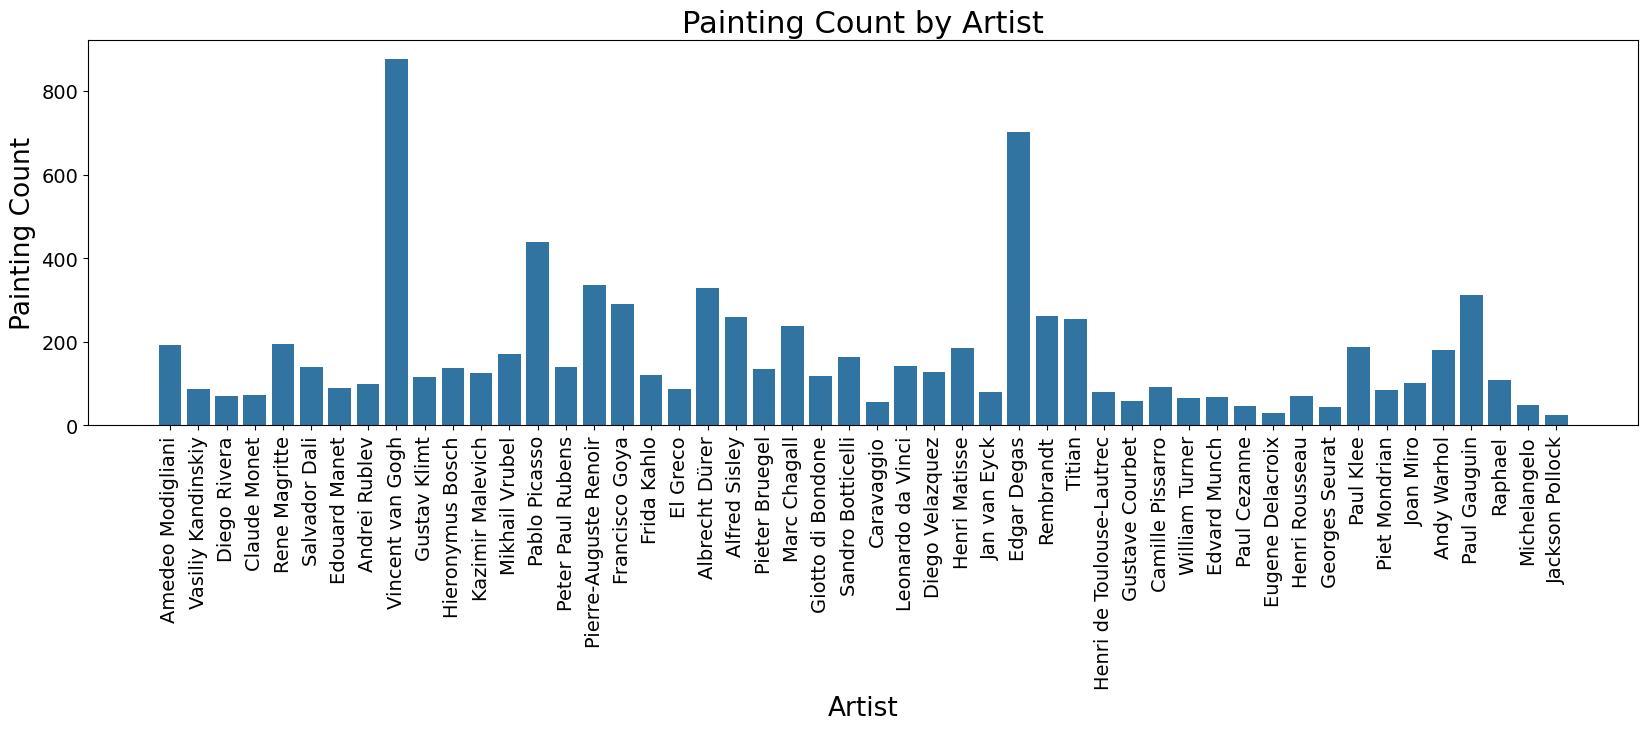

In [ ]:
df = label_df

figsize=(20, 5)

ticksize = 14
titlesize = ticksize + 8
labelsize = ticksize + 5

xlabel = "Artist"
ylabel = "Painting Count"

title = "Painting Count by Artist"


params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

plt.rcParams.update(params)

col1 = "name"
col2 = "paintings"

sns.barplot(x=col1, y=col2, data=df)
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.xticks(rotation=90)
plt.plot()

데이터의 불균형 문제
위의 그래프에서 보이는 것처럼 Vicent Van Gogh와 Edgar Degas화가의 작품이 800개 이상으로 다른 화가 작품들 보다 압도적으로 많습니다.

문제를 해결하기 위해서 TrivialAugmentWide 사용하였습니다.

## 모델 선택

In [ ]:
# Models to choose from [resnet, alexnet, vgg, squeezenet, densenet, inception]
model_name = "resnet"
# model_name = "vgg"
# model_name = "densenet"
# model_name = "inception"
# model_name = 'ViT'
# model_name == 'LoRA_ViT'
# Number of classes
num_classes = len(os.listdir(data_dir))
print(num_classes)

# Batch size for training
batch_size = 32
# batch_size = 192

# Number of epochs
num_epochs = 15

# Flag for feature extracting. When False, we finetune the whole model,
#   when True we only update the reshaped layer params
feature_extract = True

50


## 학습 모델 생성

In [ ]:
from tqdm.notebook import tqdm

def train_model(model, dataloaders, criterion, optimizer, num_epochs=25, is_inception=False):
    since = time.time()

    val_acc_history = []

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in tqdm(range(num_epochs)):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in tqdm(['train', 'val']):
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in tqdm(dataloaders[phase]):
                inputs = inputs.to(device)

                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()


                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    # Get model outputs and calculate loss
                    # Special case for inception because in training it has an auxiliary output. In train
                    #   mode we calculate the loss by summing the final output and the auxiliary output
                    #   but in testing we only consider the final output.
                    if is_inception and phase == 'train':
                        # From https://discuss.pytorch.org/t/how-to-optimize-inception-model-with-auxiliary-classifiers/7958
                        outputs, aux_outputs = model(inputs)
                        loss1 = criterion(outputs, labels)
                        loss2 = criterion(aux_outputs, labels)
                        loss = loss1 + 0.4*loss2
                    else:
                        outputs = model(inputs)
                        loss = criterion(outputs, labels)

                  #ViT:
                  #      outputs = model(inputs)
                  #      logits = outputs.logits
                  #      loss = criterion(logits, labels)

                  # _, preds = torch.max(logits, 1)

                  #Resnet:
                  #      outputs = model(inputs)
                  #      loss = criterion(outputs, labels)
                  #_, preds = torch.max(outputs, 1)








                    _, preds = torch.max(outputs, 1)      # _, preds = torch.max(logits, 1)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
            if phase == 'val':
                val_acc_history.append(epoch_acc)

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, val_acc_history

In [ ]:
def set_parameter_requires_grad(model, feature_extracting):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = False

In [ ]:
from transformers import ViTForImageClassification

## 초기 모델 설정

In [ ]:
def initialize_model(model_name , num_classes, feature_extract, use_pretrained=True):
    # Initialize these variables which will be set in this if statement. Each of these
    #   variables is model specific.
    model_ft = None
    input_size = 0

    if model_name == "resnet":
        """ Resnet50
        """
        model_ft = models.resnet50(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.fc.in_features
        model_ft.fc = nn.Linear(num_ftrs, num_classes)
        input_size = 224

    elif model_name == "alexnet":
        """ Alexnet
        """
        model_ft = models.alexnet(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.classifier[6].in_features
        model_ft.classifier[6] = nn.Linear(num_ftrs,num_classes)
        input_size = 224

    elif model_name == "vgg":
        """ VGG11_bn
        """
        model_ft = models.vgg11_bn(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.classifier[6].in_features
        model_ft.classifier[6] = nn.Linear(num_ftrs,num_classes)
        input_size = 224

    elif model_name == "squeezenet":
        """ Squeezenet
        """
        model_ft = models.squeezenet1_0(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        model_ft.classifier[1] = nn.Conv2d(512, num_classes, kernel_size=(1,1), stride=(1,1))
        model_ft.num_classes = num_classes
        input_size = 224

    elif model_name == "densenet":
        """ Densenet
        """
        model_ft = models.densenet121(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.classifier.in_features
        model_ft.classifier = nn.Linear(num_ftrs, num_classes)
        input_size = 224

    elif model_name == "inception":
        """ Inception v3
        Be careful, expects (299,299) sized images and has auxiliary output
        """
        model_ft = models.inception_v3(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        # Handle the auxilary net
        num_ftrs = model_ft.AuxLogits.fc.in_features
        model_ft.AuxLogits.fc = nn.Linear(num_ftrs, num_classes)
        # Handle the primary net
        num_ftrs = model_ft.fc.in_features
        model_ft.fc = nn.Linear(num_ftrs,num_classes)
        input_size = 299

    elif model_name == 'ViT':
        """ Vision Transformer (ViT) """
        model_name = "google/vit-base-patch16-224"
        model_ft = ViTForImageClassification.from_pretrained(model_name)
        set_parameter_requires_grad(model_ft, feature_extract)
        model_ft.classifier = nn.Linear(in_features=768, out_features=num_classes, bias=True)
        input_size = 256

    else:
        print("Invalid model name, exiting...")
        exit()

    return model_ft, input_size

In [ ]:
# Initialize the model for this run
model_ft, input_size = initialize_model(model_name, num_classes, feature_extract, use_pretrained=True)

# Print the model we just instantiated
print(model_ft)
print(input_size)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 81.2MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

## 데이터 증강

In [ ]:
# Data augmentation and normalization for training
# Just normalization for validation
from torchvision.transforms import InterpolationMode
input_size = 256

# data_transforms = {
#     'train': transforms.Compose([
#         # transforms.Resize(size=(224,224)),  # 이미지를 224x224 크기로 조정
#         transforms.GaussianBlur(kernel_size=7,sigma=(0.1,2)),
#         transforms.RandomPerspective(distortion_scale=0.5,p=1,interpolation=InterpolationMode.BILINEAR),
#         # transforms.RandomHorizontalFlip(),  # 이미지를 임의로 수평 반전
#         transforms.ToTensor(),  # 이미지를 Tensor 형식으로 변환
#         transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # 이미지 정규화
#      ]),
#     'val': transforms.Compose([
#         # transforms.Resize(size=(224,224)),  # 이미지를 224x224 크기로 조정
#         transforms.CenterCrop((224,224)),  # 이미지를 중앙에서 112x112 크기로 자름
#         # transforms.RandomHorizontalFlip(p=1),
#         transforms.ToTensor(),  # 이미지를 Tensor 형식으로 변환
#         transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # 이미지 정규화
#      ]),
#   }


#TrivialAugmentWide
data_transforms = {
    'train': transforms.Compose([
        transforms.TrivialAugmentWide(num_magnitude_bins=8),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
          # Resize to fixed size
        transforms.CenterCrop((224,224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

## 원본 / 증강 데이터 시각화

**train 증강법**

In [ ]:
from PIL import Image

# 이미지 불러오기
image_path = '/content/drive/MyDrive/images/Vincent_van_Gogh/Vincent_van_Gogh_1.jpg'
image = Image.open(image_path)

# 원본 이미지
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')
# plt.text(0, image.height, f'Shape: {image.size}', color='white', backgroundcolor='black', fontsize=12)

# 증강 이미지
augmented_transform = data_transforms['train']
augmented_image = augmented_transform(image)
augmented_image_pil = transforms.ToPILImage()(augmented_image.cpu().detach())
plt.subplot(1, 2, 2)
plt.imshow(augmented_image_pil)
plt.title('Augmented Image')
plt.axis('off')
# plt.text(0, image.height, f'Shape: {augmented_image_pil}', color='white', backgroundcolor='black', fontsize=12)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/images/Vincent_van_Gogh/Vincent_van_Gogh_1.jpg'

**val 증강법**

In [ ]:
from PIL import Image

# 이미지 불러오기
image_path = '/content/drive/MyDrive/images/Vincent_van_Gogh/Vincent_van_Gogh_1.jpg'
image = Image.open(image_path)

# 원본 이미지
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

# 증강 이미지
augmented_transform = data_transforms['val']
augmented_image = augmented_transform(image)
augmented_image_pil = transforms.ToPILImage()(augmented_image.cpu().detach())
plt.subplot(1, 2, 2)
plt.imshow(augmented_image_pil)
plt.title('Augmented Image')
plt.axis('off')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/images/Vincent_van_Gogh/Vincent_van_Gogh_1.jpg'

In [ ]:
#class 0 : 43200개, class 1 : 4800개
class_counts = label_df.paintings.to_list() #43200, 4800
num_samples = sum(class_counts) # 48000 - 전체 데이터 갯수

## train_data : 80% / val_data : 20% + WeightedRandomSampler

In [ ]:
from torch.utils.data import DataLoader, random_split, TensorDataset, WeightedRandomSampler
import math

# 전체 데이터셋 로드 (변환 없음)
full_dataset = datasets.ImageFolder(data_dir)
print('전체 데이터 수: ', len(full_dataset))
print('------------------')

# # 데이터셋을 8:2로 나누기
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# 각각의 데이터셋에 변환 적용
train_dataset.dataset.transform = data_transforms['train']
val_dataset.dataset.transform = data_transforms['val']

# # WeightedRandomSampler 생성
# weighted_sampler = WeightedRandomSampler(weights=label_df.class_weight.to_list(), num_samples=len(train_dataset), replacement=True)

# batch_size = 32

# # sampler : 데이터를 어떻게 뽑을 것인가
# # shuffle : 데이터를 섞을 것인가
train_loader = DataLoader(train_dataset, batch_size=batch_size,shuffle=True, num_workers=0) # sampler랑 shuffle 같이 쓸 수 없음
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=0)

print('train 데이터 수: ' ,len(train_dataset))
print('val 데이터 수: ', len(val_dataset))
print('------------------')
print('train_loader 수: ', len(train_loader))
print('val_loader 수: ', len(val_loader))

dataloaders_dict = {
    'train': train_loader,
    'val': val_loader
}
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

전체 데이터 수:  8446
------------------
train 데이터 수:  6756
val 데이터 수:  1690
------------------
train_loader 수:  212
val_loader 수:  53


## class weight

In [ ]:
from collections import Counter

In [ ]:
class_counts = Counter([label for _, label in train_dataset])
print(class_counts)
total_samples = sum(class_counts.values())

# 클래스별 가중치 계산
class_weights = {cls: total_samples/count for cls, count in class_counts.items()}
weights = [class_weights[label] for label in sorted(class_counts.keys())]

Counter({48: 710, 10: 564, 33: 362, 38: 271, 0: 262, 35: 250, 15: 233, 42: 214, 46: 208, 1: 198, 30: 183, 36: 152, 21: 150, 4: 147, 2: 145, 43: 143, 45: 137, 32: 130, 44: 116, 29: 113, 40: 111, 37: 109, 18: 103, 28: 103, 9: 101, 16: 101, 24: 97, 19: 94, 41: 88, 27: 82, 11: 75, 3: 74, 5: 73, 47: 72, 39: 72, 23: 67, 26: 67, 13: 65, 7: 58, 12: 56, 8: 55, 49: 54, 22: 51, 6: 47, 20: 43, 17: 37, 34: 37, 31: 34, 14: 23, 25: 19})


In [ ]:
# Tensor로 변환
class_weights_tensor = torch.FloatTensor(weights).to(device)

## 옵티마이저 / 손실함수 설정

In [ ]:
# Send the model to GPU
model_ft = model_ft.to(device)

# Gather the parameters to be optimized/updated in this run. If we are
#  finetuning we will be updating all parameters. However, if we are
#  doing feature extract method, we will only update the parameters
#  that we have just initialized, i.e. the parameters with requires_grad
#  is True.
params_to_update = model_ft.parameters()
print("Params to learn:")
if feature_extract:
    params_to_update = []
    for name,param in model_ft.named_parameters():
        if param.requires_grad == True:
            params_to_update.append(param)
            print("\t",name)
else:
    for name,param in model_ft.named_parameters():
        if param.requires_grad == True:
            print("\t",name)

# Observe that all parameters are being optimized
# optimizer_ft = optim.SGD(params_to_update, lr=0.001, momentum=0.9)
# optimizer_ft = optim.Adam(params_to_update, lr=0.2, betas=(0.9, 0.999), eps=1e-8, weight_decay=4, amsgrad=False)
optimizer_ft = optim.Adam(params_to_update, lr=0.0001)

# 데이터 불균형이 심하므로 가중 손실 함수를 사용.
# 가중 손실 함수는 수가 적은 클래스에 대해서 더 큰 가중치를 부여해서 업데이트 균형을 맞추는 것이다.

# weights = label_df.class_weight.to_list()
# print(weights)
# class_weight = torch.FloatTensor(weights).to(device)

criterion = nn.CrossEntropyLoss(weight = class_weights_tensor)

Params to learn:
	 fc.weight
	 fc.bias


## 모델 학습

In [ ]:
# Train and evaluate
model_ft, hist = train_model(model_ft, dataloaders_dict, criterion, optimizer_ft, num_epochs=num_epochs,is_inception=False)

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch 0/14
----------


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/212 [00:00<?, ?it/s]

train Loss: 3.7284 Acc: 0.1234


  0%|          | 0/53 [00:00<?, ?it/s]

val Loss: 3.4695 Acc: 0.2183

Epoch 1/14
----------


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/212 [00:00<?, ?it/s]

train Loss: 3.2739 Acc: 0.3287


  0%|          | 0/53 [00:00<?, ?it/s]

val Loss: 3.1076 Acc: 0.4101

Epoch 2/14
----------


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/212 [00:00<?, ?it/s]

train Loss: 2.9437 Acc: 0.4190


  0%|          | 0/53 [00:00<?, ?it/s]

val Loss: 2.8520 Acc: 0.4438

Epoch 3/14
----------


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/212 [00:00<?, ?it/s]

train Loss: 2.6956 Acc: 0.4593


  0%|          | 0/53 [00:00<?, ?it/s]

val Loss: 2.6667 Acc: 0.4686

Epoch 4/14
----------


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/212 [00:00<?, ?it/s]

train Loss: 2.5028 Acc: 0.4905


  0%|          | 0/53 [00:00<?, ?it/s]

val Loss: 2.5302 Acc: 0.4444

Epoch 5/14
----------


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/212 [00:00<?, ?it/s]

train Loss: 2.3440 Acc: 0.5015


  0%|          | 0/53 [00:00<?, ?it/s]

val Loss: 2.4109 Acc: 0.4550

Epoch 6/14
----------


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/212 [00:00<?, ?it/s]

train Loss: 2.2273 Acc: 0.5192


  0%|          | 0/53 [00:00<?, ?it/s]

val Loss: 2.3017 Acc: 0.4964

Epoch 7/14
----------


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/212 [00:00<?, ?it/s]

train Loss: 2.1066 Acc: 0.5275


  0%|          | 0/53 [00:00<?, ?it/s]

val Loss: 2.2169 Acc: 0.5053

Epoch 8/14
----------


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/212 [00:00<?, ?it/s]

train Loss: 2.0158 Acc: 0.5354


  0%|          | 0/53 [00:00<?, ?it/s]

val Loss: 2.1623 Acc: 0.4935

Epoch 9/14
----------


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/212 [00:00<?, ?it/s]

train Loss: 1.9387 Acc: 0.5568


  0%|          | 0/53 [00:00<?, ?it/s]

val Loss: 2.1058 Acc: 0.4876

Epoch 10/14
----------


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/212 [00:00<?, ?it/s]

train Loss: 1.8613 Acc: 0.5579


  0%|          | 0/53 [00:00<?, ?it/s]

val Loss: 2.0596 Acc: 0.5053

Epoch 11/14
----------


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/212 [00:00<?, ?it/s]

train Loss: 1.8075 Acc: 0.5650


  0%|          | 0/53 [00:00<?, ?it/s]

val Loss: 2.0358 Acc: 0.4882

Epoch 12/14
----------


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/212 [00:00<?, ?it/s]

train Loss: 1.7572 Acc: 0.5703


  0%|          | 0/53 [00:00<?, ?it/s]

val Loss: 2.0005 Acc: 0.5136

Epoch 13/14
----------


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/212 [00:00<?, ?it/s]

train Loss: 1.6970 Acc: 0.5801


  0%|          | 0/53 [00:00<?, ?it/s]

val Loss: 1.9625 Acc: 0.5112

Epoch 14/14
----------


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/212 [00:00<?, ?it/s]

train Loss: 1.6554 Acc: 0.5793


  0%|          | 0/53 [00:00<?, ?it/s]

val Loss: 1.9280 Acc: 0.5136

Training complete in 16m 9s
Best val Acc: 0.513609


# Save the results to CSV

In [ ]:
def save_results_to_CSV(model_name,model_results,split_size,results_save_path):
     model_results_pd = pd.DataFrame(model_results)
     model_results_pd['model_name'] = model_name
     model_results_pd['data_split_size'] = split_size
     print(f"Saving results to: {results_save_path}")
     model_results_pd.to_csv(results_save_path,index=False)

In [ ]:
save_results_to_CSV(model_results = [{'total_epoch': 15 , 'best_val_acc':0.513609, 'loss':   1.9280}],
                    model_name = "ResNet50_Weighted_Trivial",
                    split_size = 0.8,
                    results_save_path = "results_ResNet50_Weighted_Trivial.csv")

Saving results to: results_ResNet50_Weighted_Trivial.csv


# Save the model

In [ ]:
torch.save(model_ft, 'ResNet50_Weighted_Trivial.pth')

모델 불러오기

In [ ]:
model = torch.load('ResNet.pth')